In [5]:
import matplotlib.pyplot as plt
import numpy as np

from lstchain.io import event_source
from lstchain.calib.camera.r0 import LSTR0Corrections

plt.rcParams['font.size'] = 18

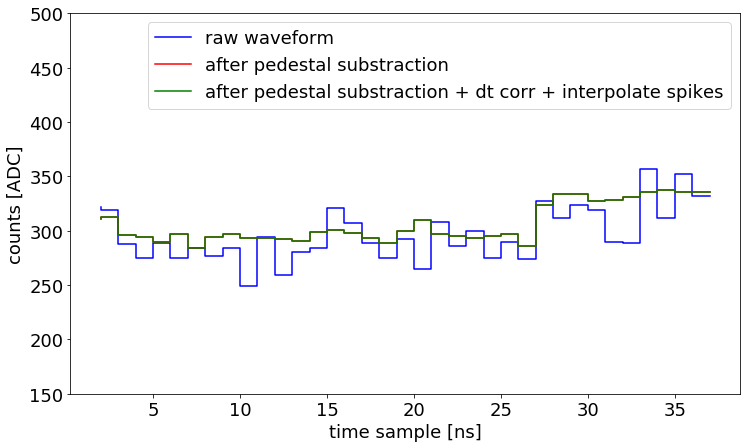

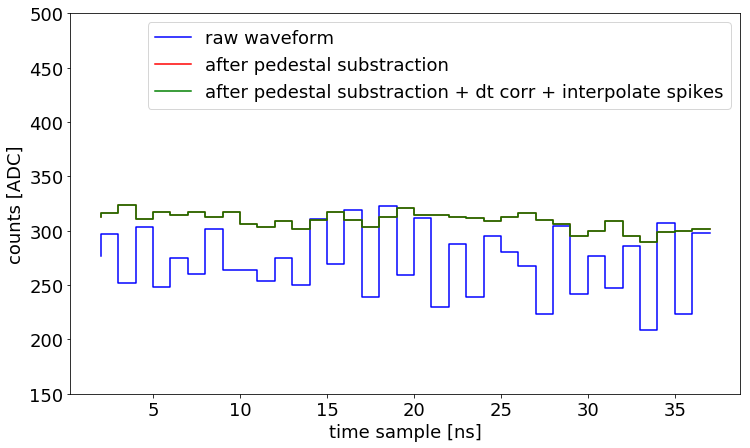

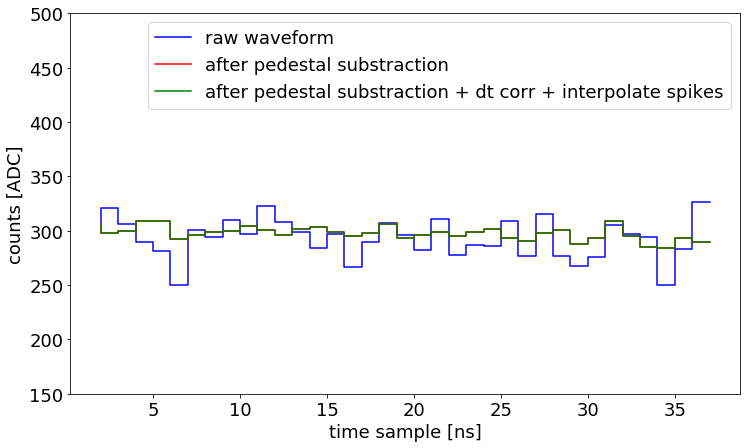

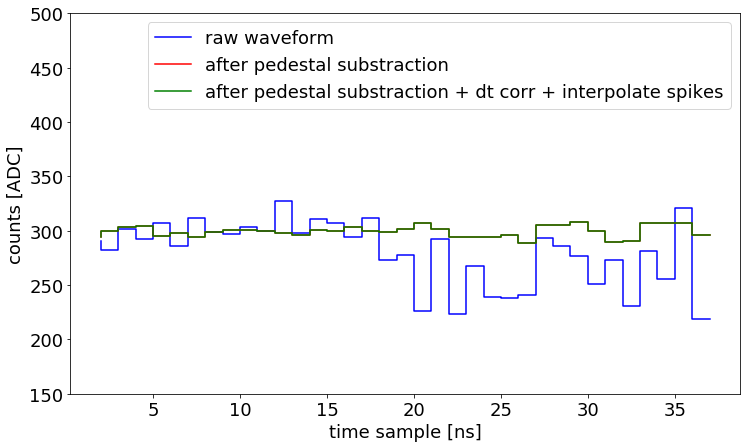

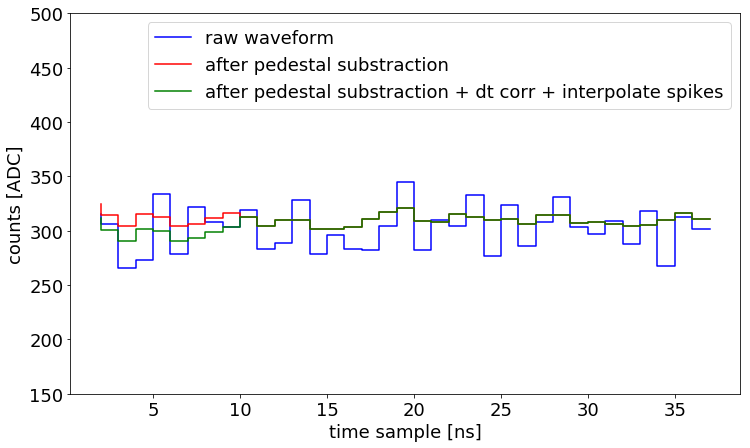

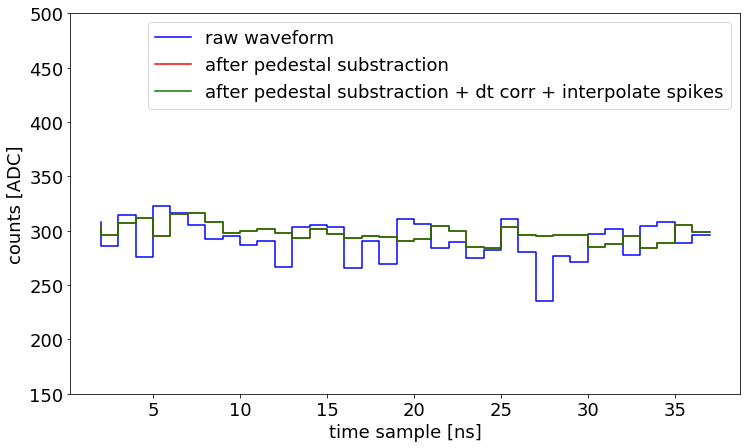

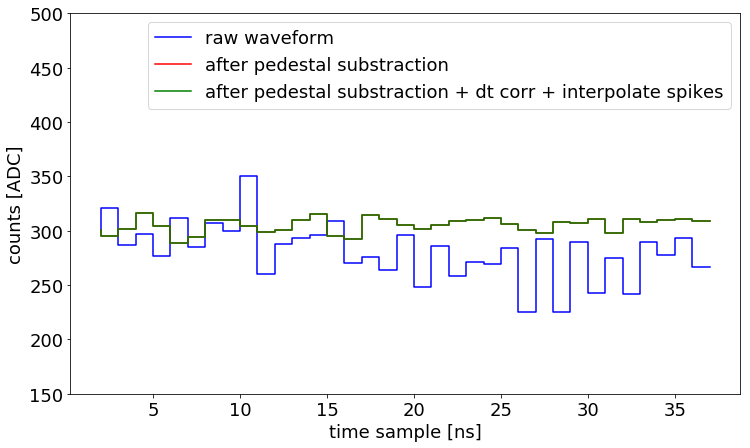

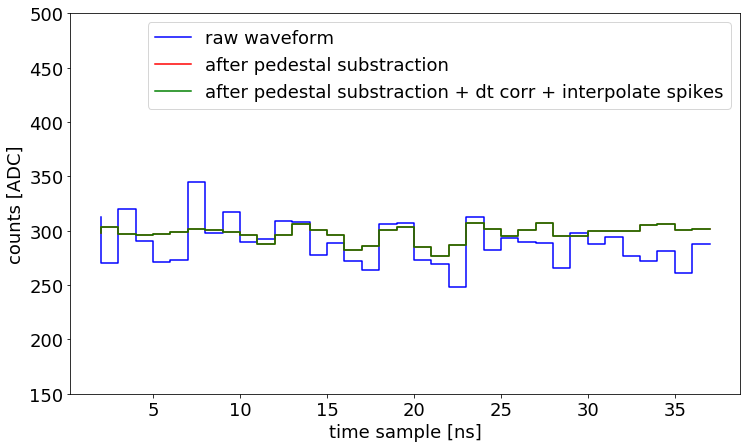

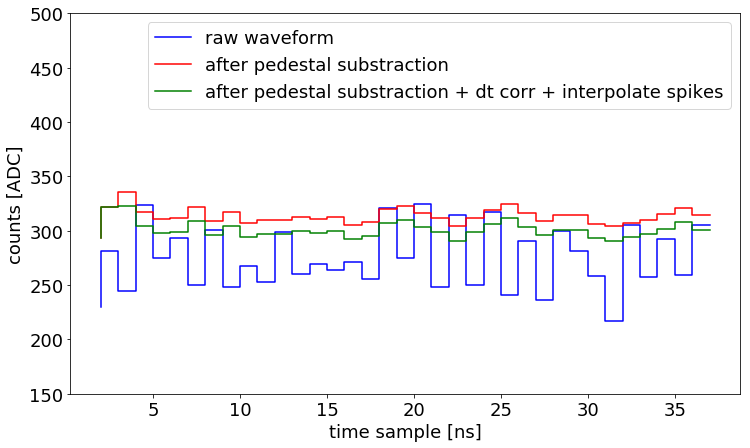

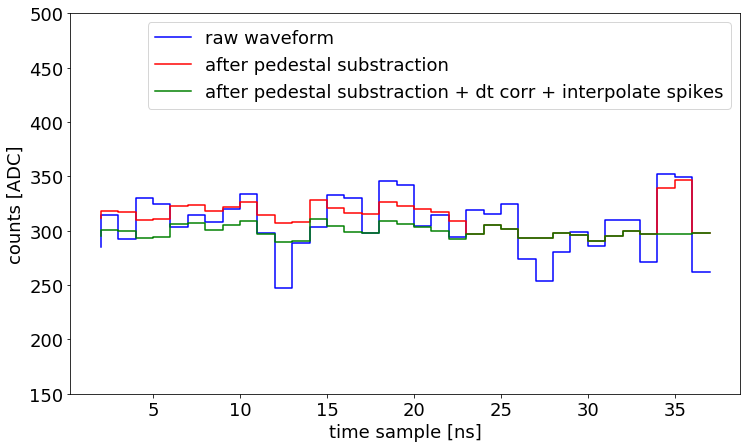

In [6]:
# Give path to real LST data
reader = event_source(input_url="/media/pawel1/ADATA HD330/20190215/LST-1.*.Run00097.0001.fits.fz",
                        max_events=10)

# Give path to pedestal file
lst_r0 = LSTR0Corrections(pedestal_path=
                          "/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain-extra/calib/camera/pedestal_run97_new.fits", offset=300)

t = np.linspace(2, 37, 36)

for ev in reader:
    plt.figure(figsize=(12, 7))
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="blue", label="raw waveform")
    
    lst_r0.subtract_pedestal(ev)
    
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="red", label="after pedestal substraction ")
    
    lst_r0.time_lapse_corr(ev)
    lst_r0.interpolate_spikes(ev)
    
    plt.step(t,  ev.r0.tel[0].waveform[0, 7, 2:38], color="green", label="after pedestal substraction + dt corr + interpolate spikes")
    
    plt.xlabel("time sample [ns]")
    plt.ylabel("counts [ADC]")
    plt.legend()
    plt.ylim([150, 500])
    plt.show()